# Penguins -  Decision Tree

### Data Dictionary:

    * species: penguin species (Chinstrap, Adélie, or Gentoo)
    * culmen_length_mm: culmen length (mm)
    * culmen_depth_mm: culmen depth (mm)
    * flipper_length_mm: flipper length (mm)
    * body_mass_g: body mass (g)
    * island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
    * sex: penguin sex

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix

In [2]:
df = pd.read_csv("penguins_size.csv")

In [3]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
# "species" is out Target Variable.

In [12]:
df.shape

(344, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [6]:
df["species"].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [8]:
df["island"].value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

In [9]:
df["sex"].value_counts()

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

In [20]:
df[df["sex"] == "."]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [ ]:
# One of the Observation has "sex" value as ".", which is clearly a typing mistake.

# We can change that Value by Seeing How close other features are for that Observation to Mean Values of "MALE" and "FEMALE"
# for "Gentoo" species.

### Missing value Treatment:

In [10]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [11]:
df.isna().sum() / len(df) * 100

species              0.000000
island               0.000000
culmen_length_mm     0.581395
culmen_depth_mm      0.581395
flipper_length_mm    0.581395
body_mass_g          0.581395
sex                  2.906977
dtype: float64

In [ ]:
# We can Drop these Rows as it's less than 3% of Data.

In [13]:
df = df.dropna()

In [14]:
df.shape

(334, 7)

In [ ]:
# we lost Just 10 Rows.

In [15]:
df.isna().sum() / len(df) * 100

species              0.0
island               0.0
culmen_length_mm     0.0
culmen_depth_mm      0.0
flipper_length_mm    0.0
body_mass_g          0.0
sex                  0.0
dtype: float64

In [16]:
df["sex"].value_counts()

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

In [21]:
# Checking Mean Values of Features for "MALE" and "FEMALE" penguins for "GEN":

df[df["species"] == "Gentoo"].groupby("sex").describe().T

sex                           .       FEMALE         MALE
culmen_length_mm  count     1.0    58.000000    61.000000
                  mean     44.5    45.563793    49.473770
                  std       NaN     2.051247     2.720594
                  min      44.5    40.900000    44.400000
                  25%      44.5    43.850000    48.100000
                  50%      44.5    45.500000    49.500000
                  75%      44.5    46.875000    50.500000
                  max      44.5    50.500000    59.600000
culmen_depth_mm   count     1.0    58.000000    61.000000
                  mean     15.7    14.237931    15.718033
                  std       NaN     0.540249     0.741060
                  min      15.7    13.100000    14.100000
                  25%      15.7    13.800000    15.200000
                  50%      15.7    14.250000    15.700000
                  75%      15.7    14.600000    16.100000
                  max      15.7    15.500000    17.300000
flipper_length_mm count     1.0    58.000000    61.000000
                  mean    217.0   212.706897   221.540984
                  std       NaN     3.897856     5.673252
                  min     217.0   203.000000   208.000000
                  25%     217.0   210.000000   218.000000
                  50%     217.0   212.000000   221.000000
                  75%     217.0   215.000000   225.000000
                  max     217.0   222.000000   231.000000
body_mass_g       count     1.0    58.000000    61.000000
                  mean   4875.0  4679.741379  5484.836066
                  std       NaN   281.578294   313.158596
                  min    4875.0  3950.000000  4750.000000
                  25%    4875.0  4462.500000  5300.000000
                  50%    4875.0  4700.000000  5500.000000
                  75%    4875.0  4875.000000  5700.000000
                  max    4875.0  5200.000000  6300.000000

In [ ]:
# By Looking at Mean values for All Features, Our Observation Seems More Close to "FEMALE".

In [22]:
df[df["sex"] == "."]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [23]:
df.at[336, "sex"] = "FEMALE"

In [24]:
df[df["sex"] == "."]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex


### EDA:

In [25]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


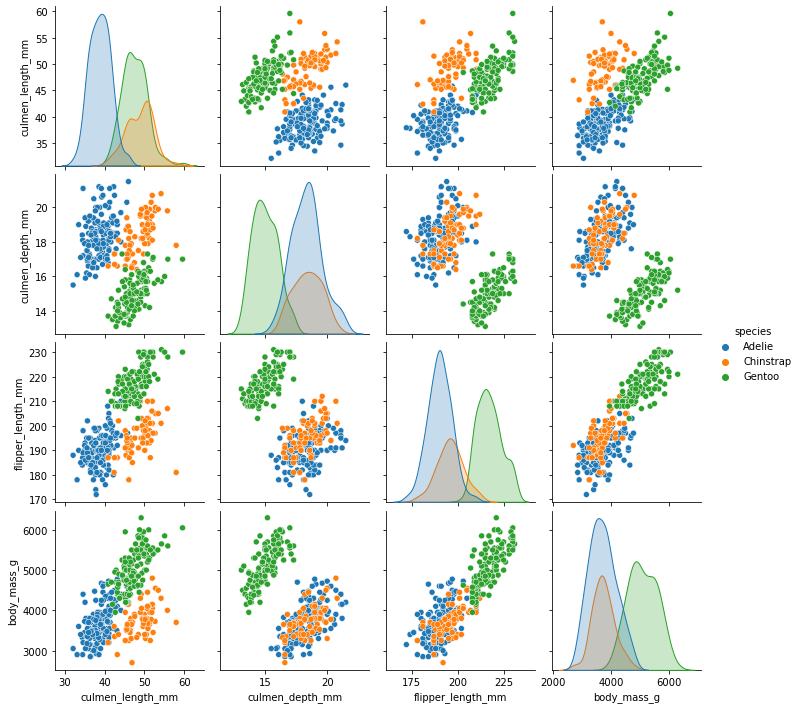

In [27]:
sns.pairplot(df, hue= "species")
plt.show()

### getting Dummies for Categorical Variables:

In [28]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [30]:
pd.get_dummies(df.drop("species", axis= 1), drop_first= True)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1,1
1,39.5,17.4,186.0,3800.0,0,1,0
2,40.3,18.0,195.0,3250.0,0,1,0
4,36.7,19.3,193.0,3450.0,0,1,0
5,39.3,20.6,190.0,3650.0,0,1,1
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,0,0
340,46.8,14.3,215.0,4850.0,0,0,0
341,50.4,15.7,222.0,5750.0,0,0,1
342,45.2,14.8,212.0,5200.0,0,0,0


### Train Test Split:

In [31]:
# Features:

x = pd.get_dummies(df.drop("species", axis= 1), drop_first= True)

In [32]:
x.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1,1
1,39.5,17.4,186.0,3800.0,0,1,0
2,40.3,18.0,195.0,3250.0,0,1,0
4,36.7,19.3,193.0,3450.0,0,1,0
5,39.3,20.6,190.0,3650.0,0,1,1


In [33]:
# Target:

y = df["species"]

In [34]:
y.head()

0    Adelie
1    Adelie
2    Adelie
4    Adelie
5    Adelie
Name: species, dtype: object

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)

In [36]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(267, 7)
(67, 7)
(267,)
(67,)


### Scalling:

In [37]:
sc = StandardScaler()

In [38]:
temp = sc.fit_transform(x_train)
x_train = pd.DataFrame(temp, columns= x_train.columns)
x_train.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,-0.596447,-1.743053,0.921649,0.533572,-0.792495,-0.375534,-1.034296
1,-1.265806,0.327614,-0.724133,-1.073743,1.261837,-0.375534,-1.034296
2,1.095541,-0.631963,1.637206,1.399049,-0.792495,-0.375534,0.966842
3,-1.526111,1.034672,-0.867245,-0.517365,-0.792495,-0.375534,-1.034296
4,-0.670821,0.883159,-1.511246,-0.331905,-0.792495,-0.375534,0.966842


In [39]:
temp = sc.transform(x_test)
x_test = pd.DataFrame(temp, columns= x_test.columns)
x_test.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,-0.856753,-0.227930,-1.654358,-1.197382,1.261837,-0.375534,-1.034296
1,0.519149,-1.288516,1.494094,0.811761,-0.792495,-0.375534,-1.034296
2,-0.373328,0.984168,-0.437910,-0.270085,-0.792495,2.662876,0.966842
3,1.058355,0.075094,-0.223243,-0.671914,1.261837,-0.375534,-1.034296
4,-0.559261,0.529631,-0.652578,-0.208266,-0.792495,-0.375534,0.966842


### Models:

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [40]:
model1 = DecisionTreeClassifier()

In [41]:
model1.fit(x_train, y_train)

DecisionTreeClassifier()

In [42]:
pred = model1.predict(x_test)

In [43]:
accuracy_score(y_test, pred)

1.0

In [45]:
confusion_matrix(y_test, pred)

array([[31,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 23]], dtype=int64)

In [46]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        31
   Chinstrap       1.00      1.00      1.00        13
      Gentoo       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



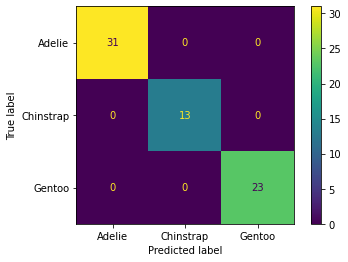

In [47]:
plot_confusion_matrix(model1, x_test, y_test)
plt.show()

In [48]:
model1.feature_importances_

array([0.34906346, 0.079049  , 0.51648036, 0.        , 0.03346437,
       0.        , 0.0219428 ])

In [56]:
pd.DataFrame(index= x.columns, data = model1.feature_importances_, columns= ["Feature Importance"])

,Feature Importance
culmen_length_mm,0.349063
culmen_depth_mm,0.079049
flipper_length_mm,0.516480
body_mass_g,0.000000
island_Dream,0.033464
island_Torgersen,0.000000
sex_MALE,0.021943


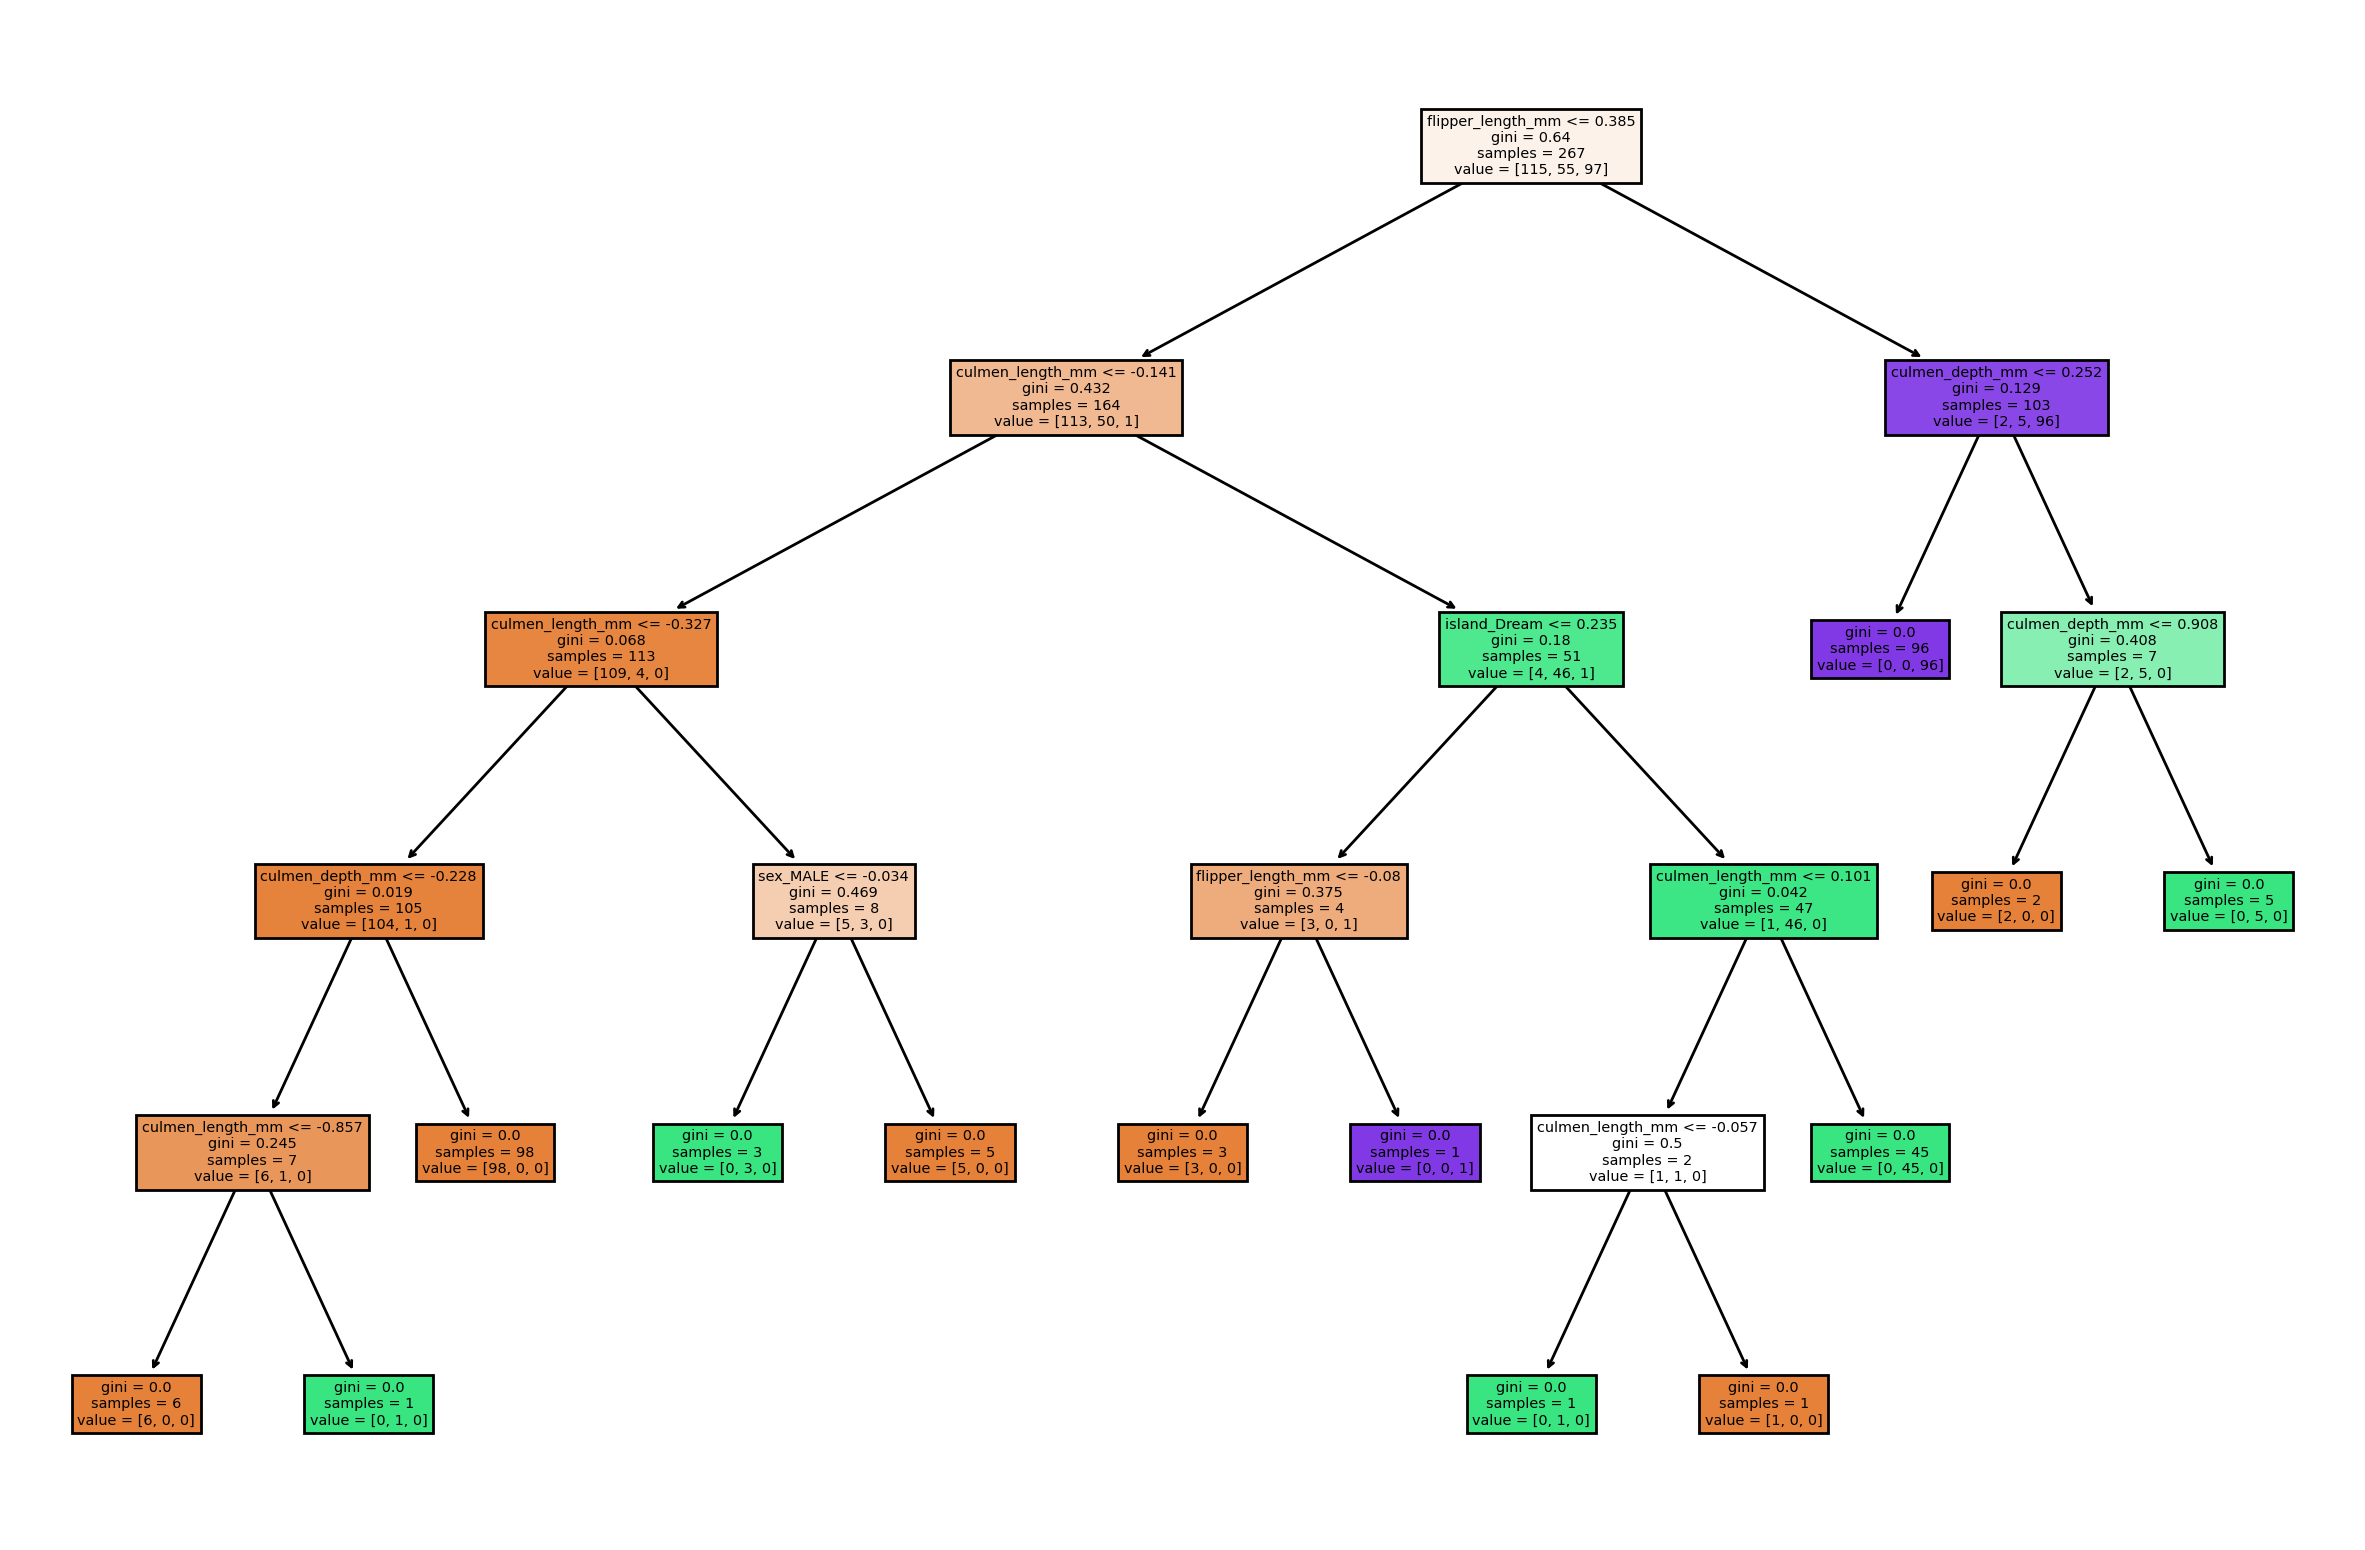

In [61]:
plt.figure(figsize= (15,10), dpi= 200)
plot_tree(model1, feature_names= x.columns, filled= True)
plt.show()

### Trying Different Models:

In [62]:
def model_evaluation(model):
    '''
    This Function will Print Accuracy Score, Confusion Matrix, Classification Report and Decision Tree for
    Different Models.
    '''
    
    predictions = model.predict(x_test)
    
    print(f"Accuracy Score is : {accuracy_score(y_test, pred)}")
    print("\n")
    
    plot_confusion_matrix(model, x_test, y_test)
    
    print(classification_report(y_test, pred))
    
    plt.figure(figsize= (15,10), dpi= 200)
    plot_tree(model, feature_names= x.columns, filled= True)
    plt.show()

In [63]:
model2 = DecisionTreeClassifier(max_depth= 2)

In [64]:
model2.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

Accuracy Score is : 1.0


              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        31
   Chinstrap       1.00      1.00      1.00        13
      Gentoo       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



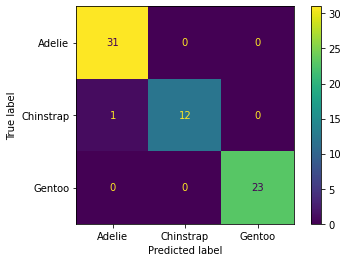

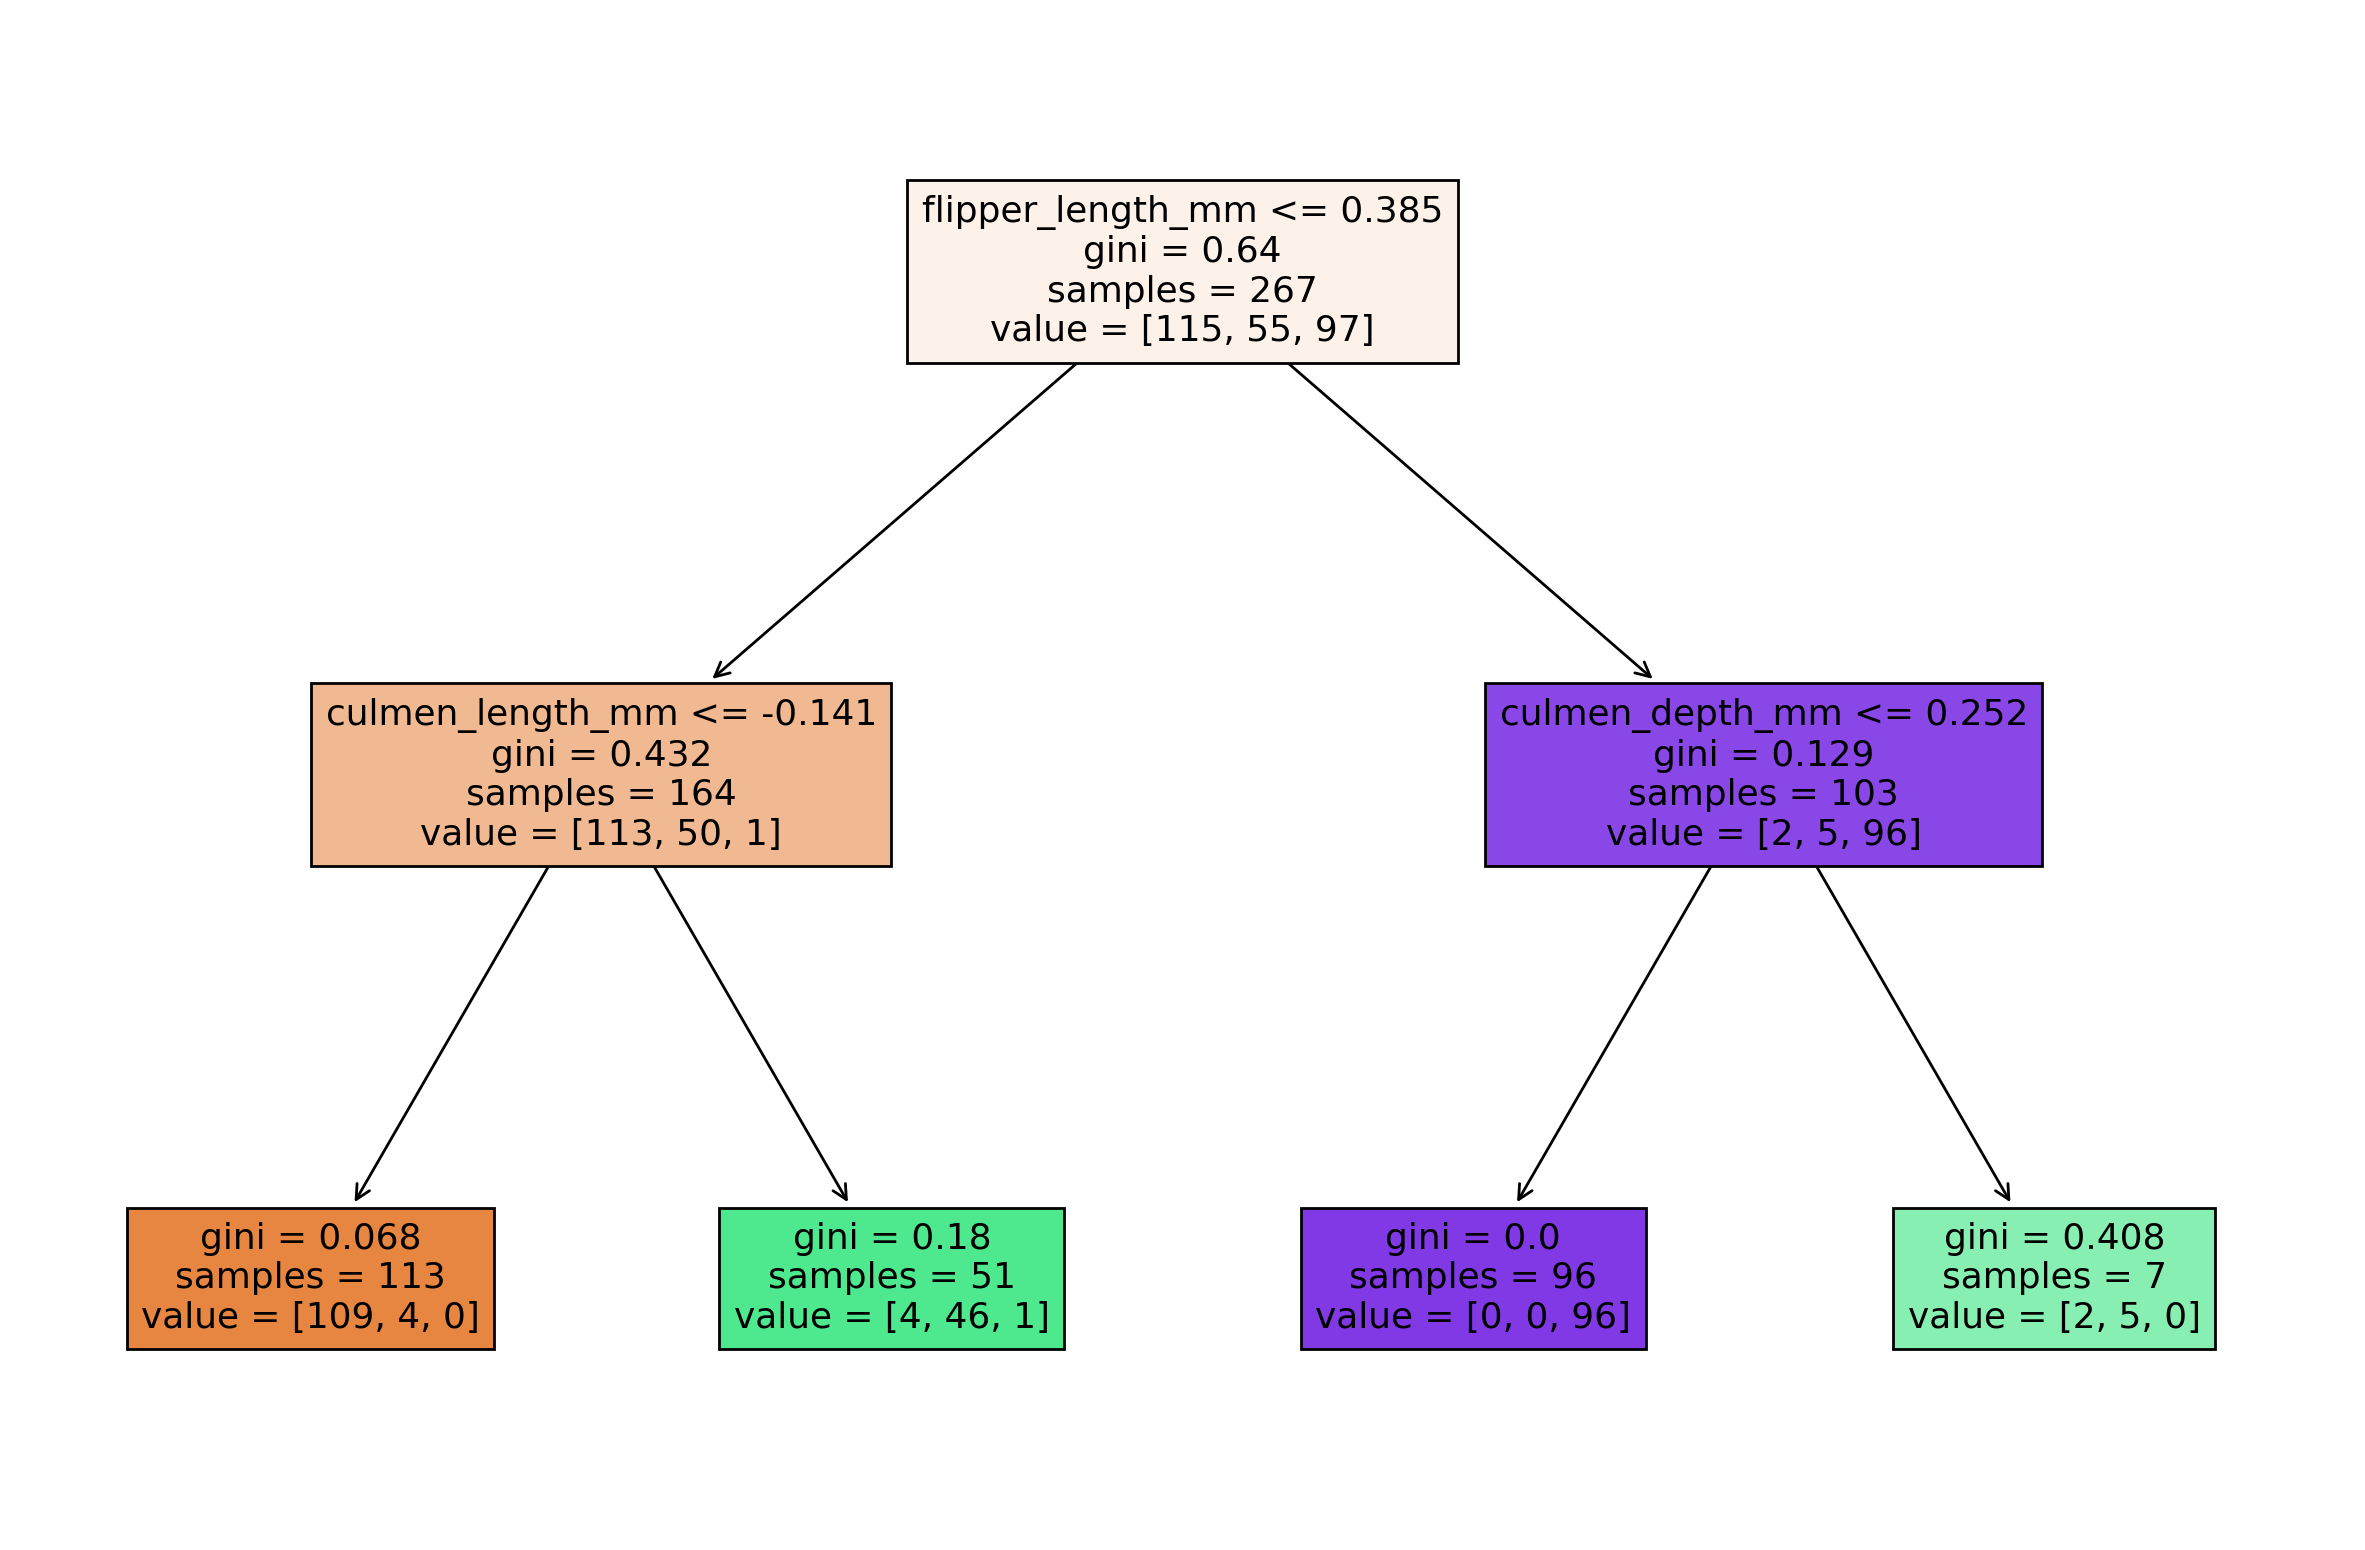

In [65]:
model_evaluation(model2)

In [66]:
model3 = DecisionTreeClassifier(min_samples_split= 5)

In [67]:
model3.fit(x_train, y_train)

DecisionTreeClassifier(min_samples_split=5)

Accuracy Score is : 1.0


              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        31
   Chinstrap       1.00      1.00      1.00        13
      Gentoo       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



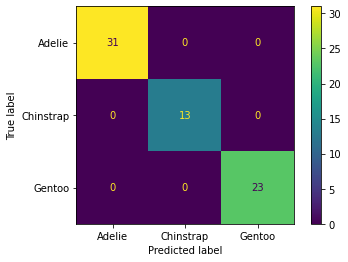

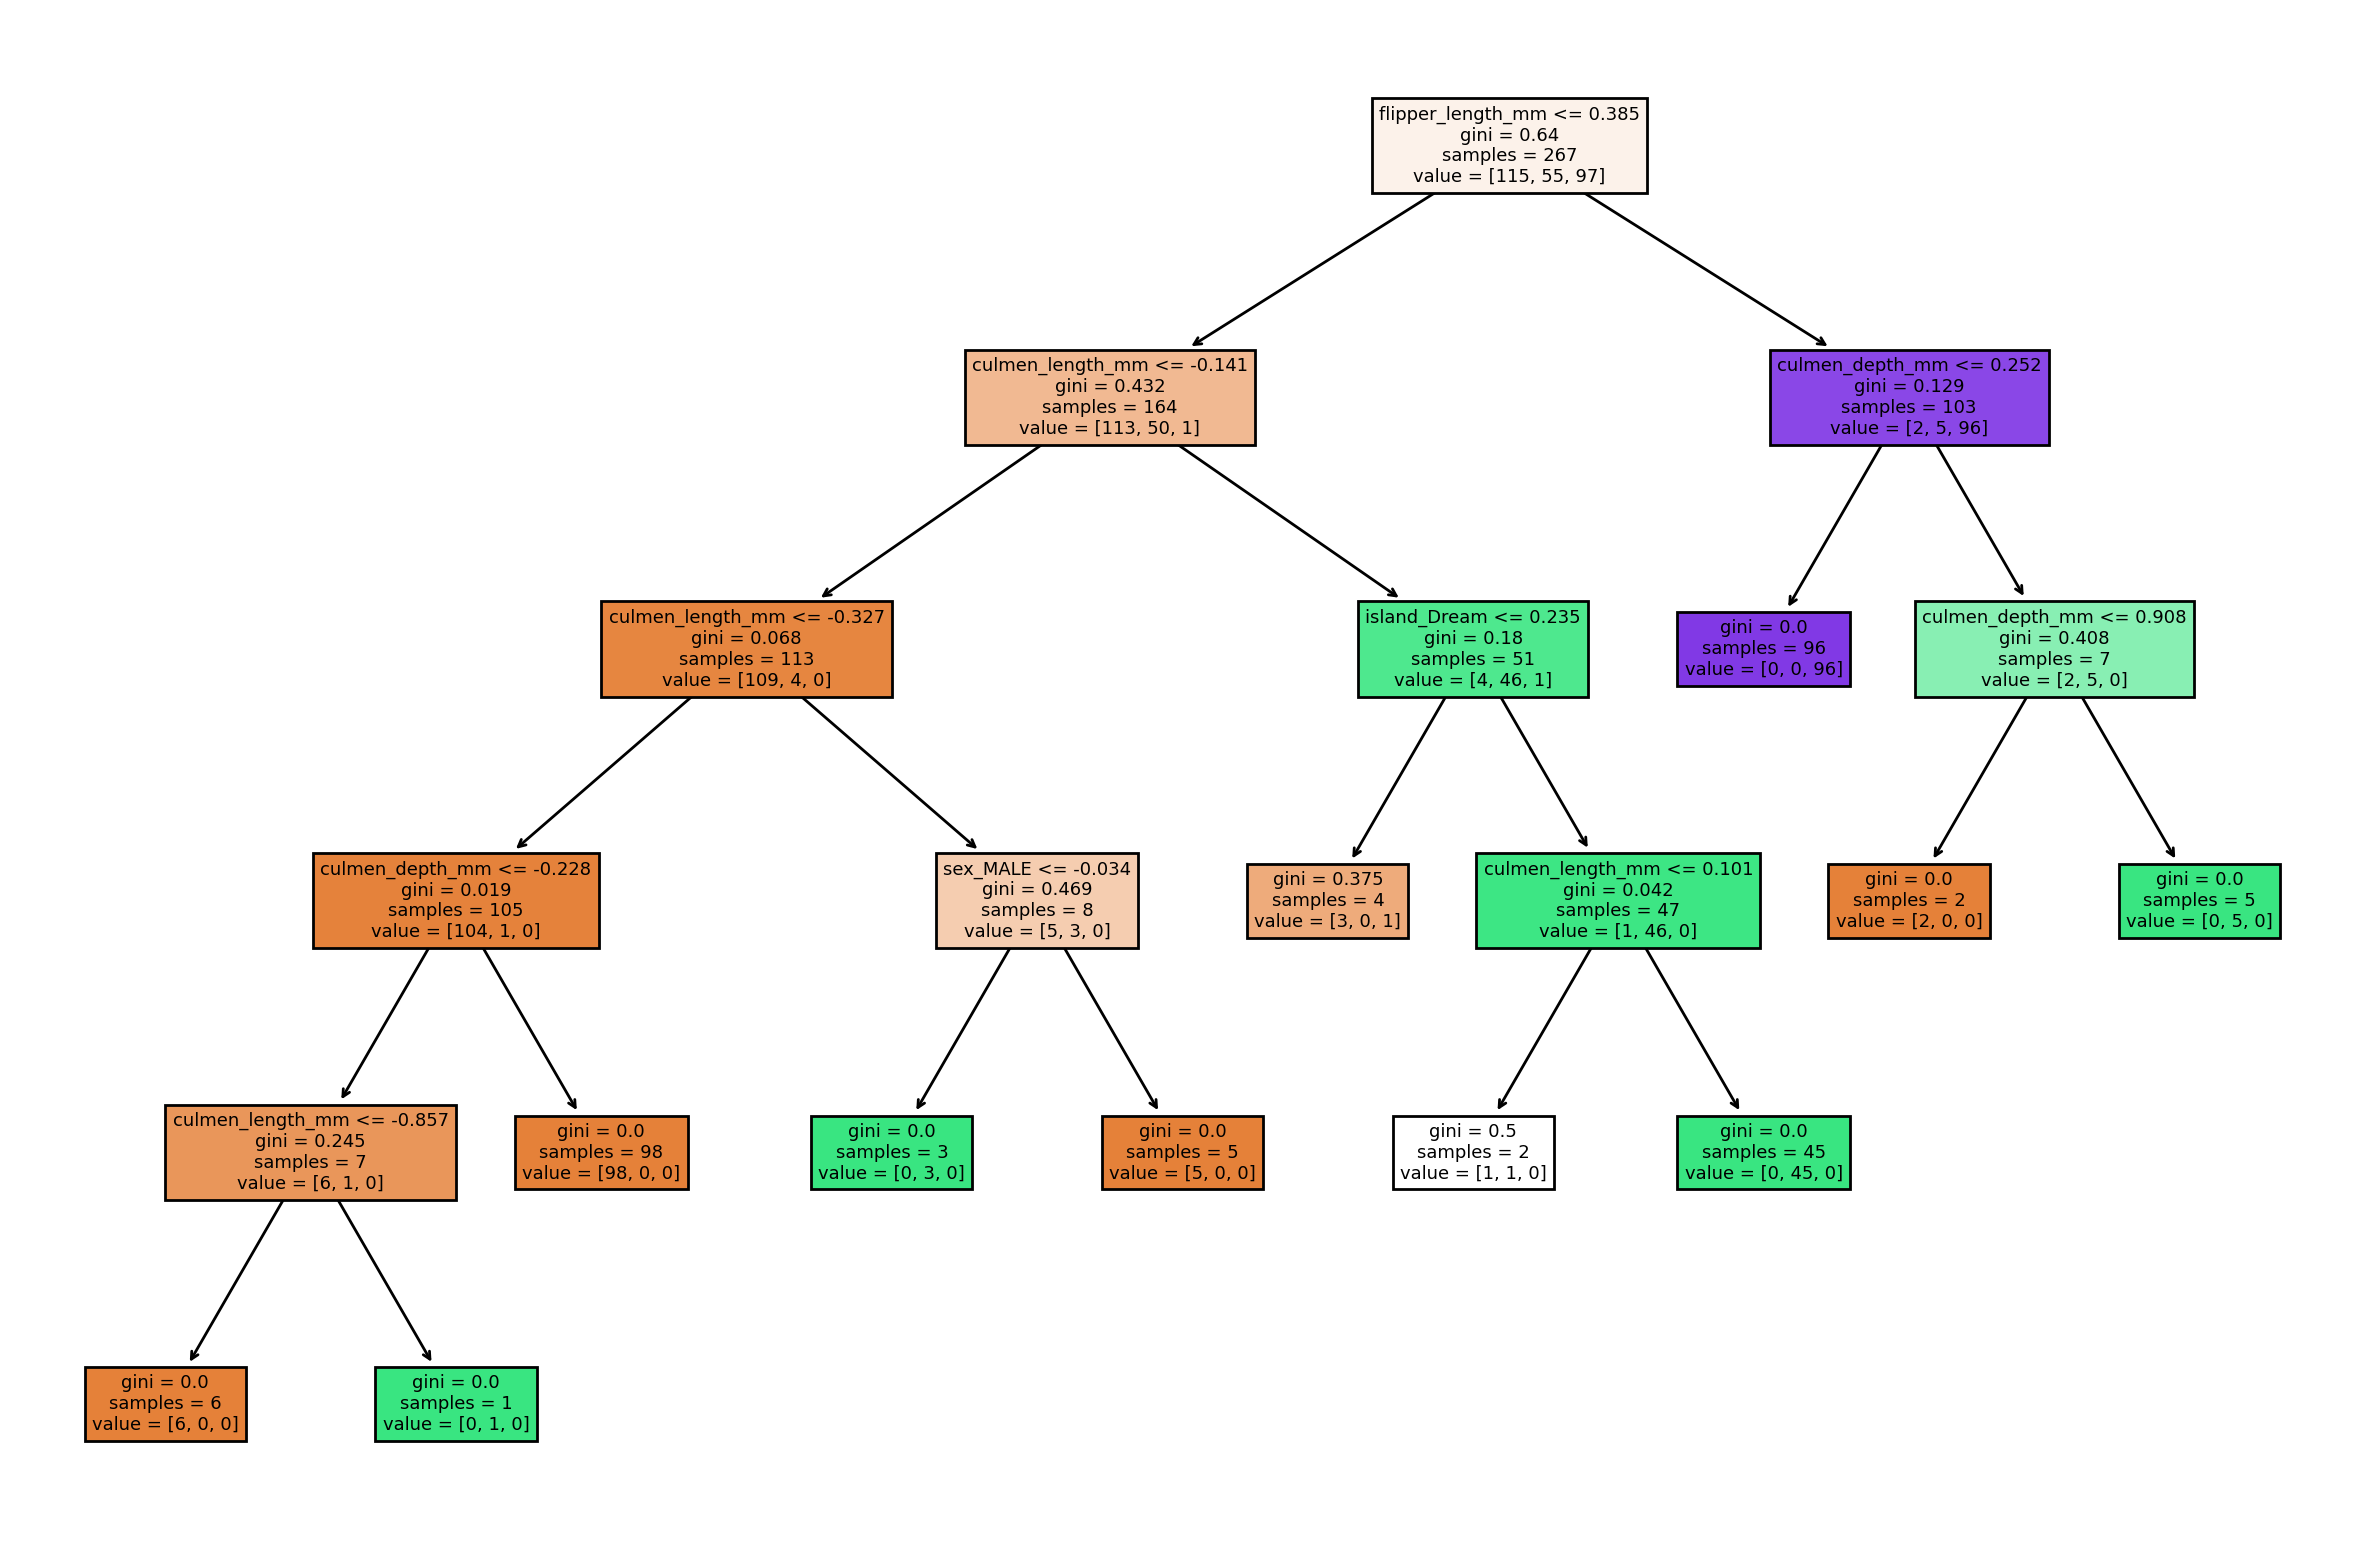

In [68]:
model_evaluation(model3)

In [69]:
model4 = DecisionTreeClassifier(criterion= "entropy")

In [70]:
model4.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

Accuracy Score is : 1.0


              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        31
   Chinstrap       1.00      1.00      1.00        13
      Gentoo       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



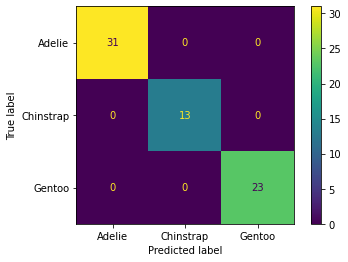

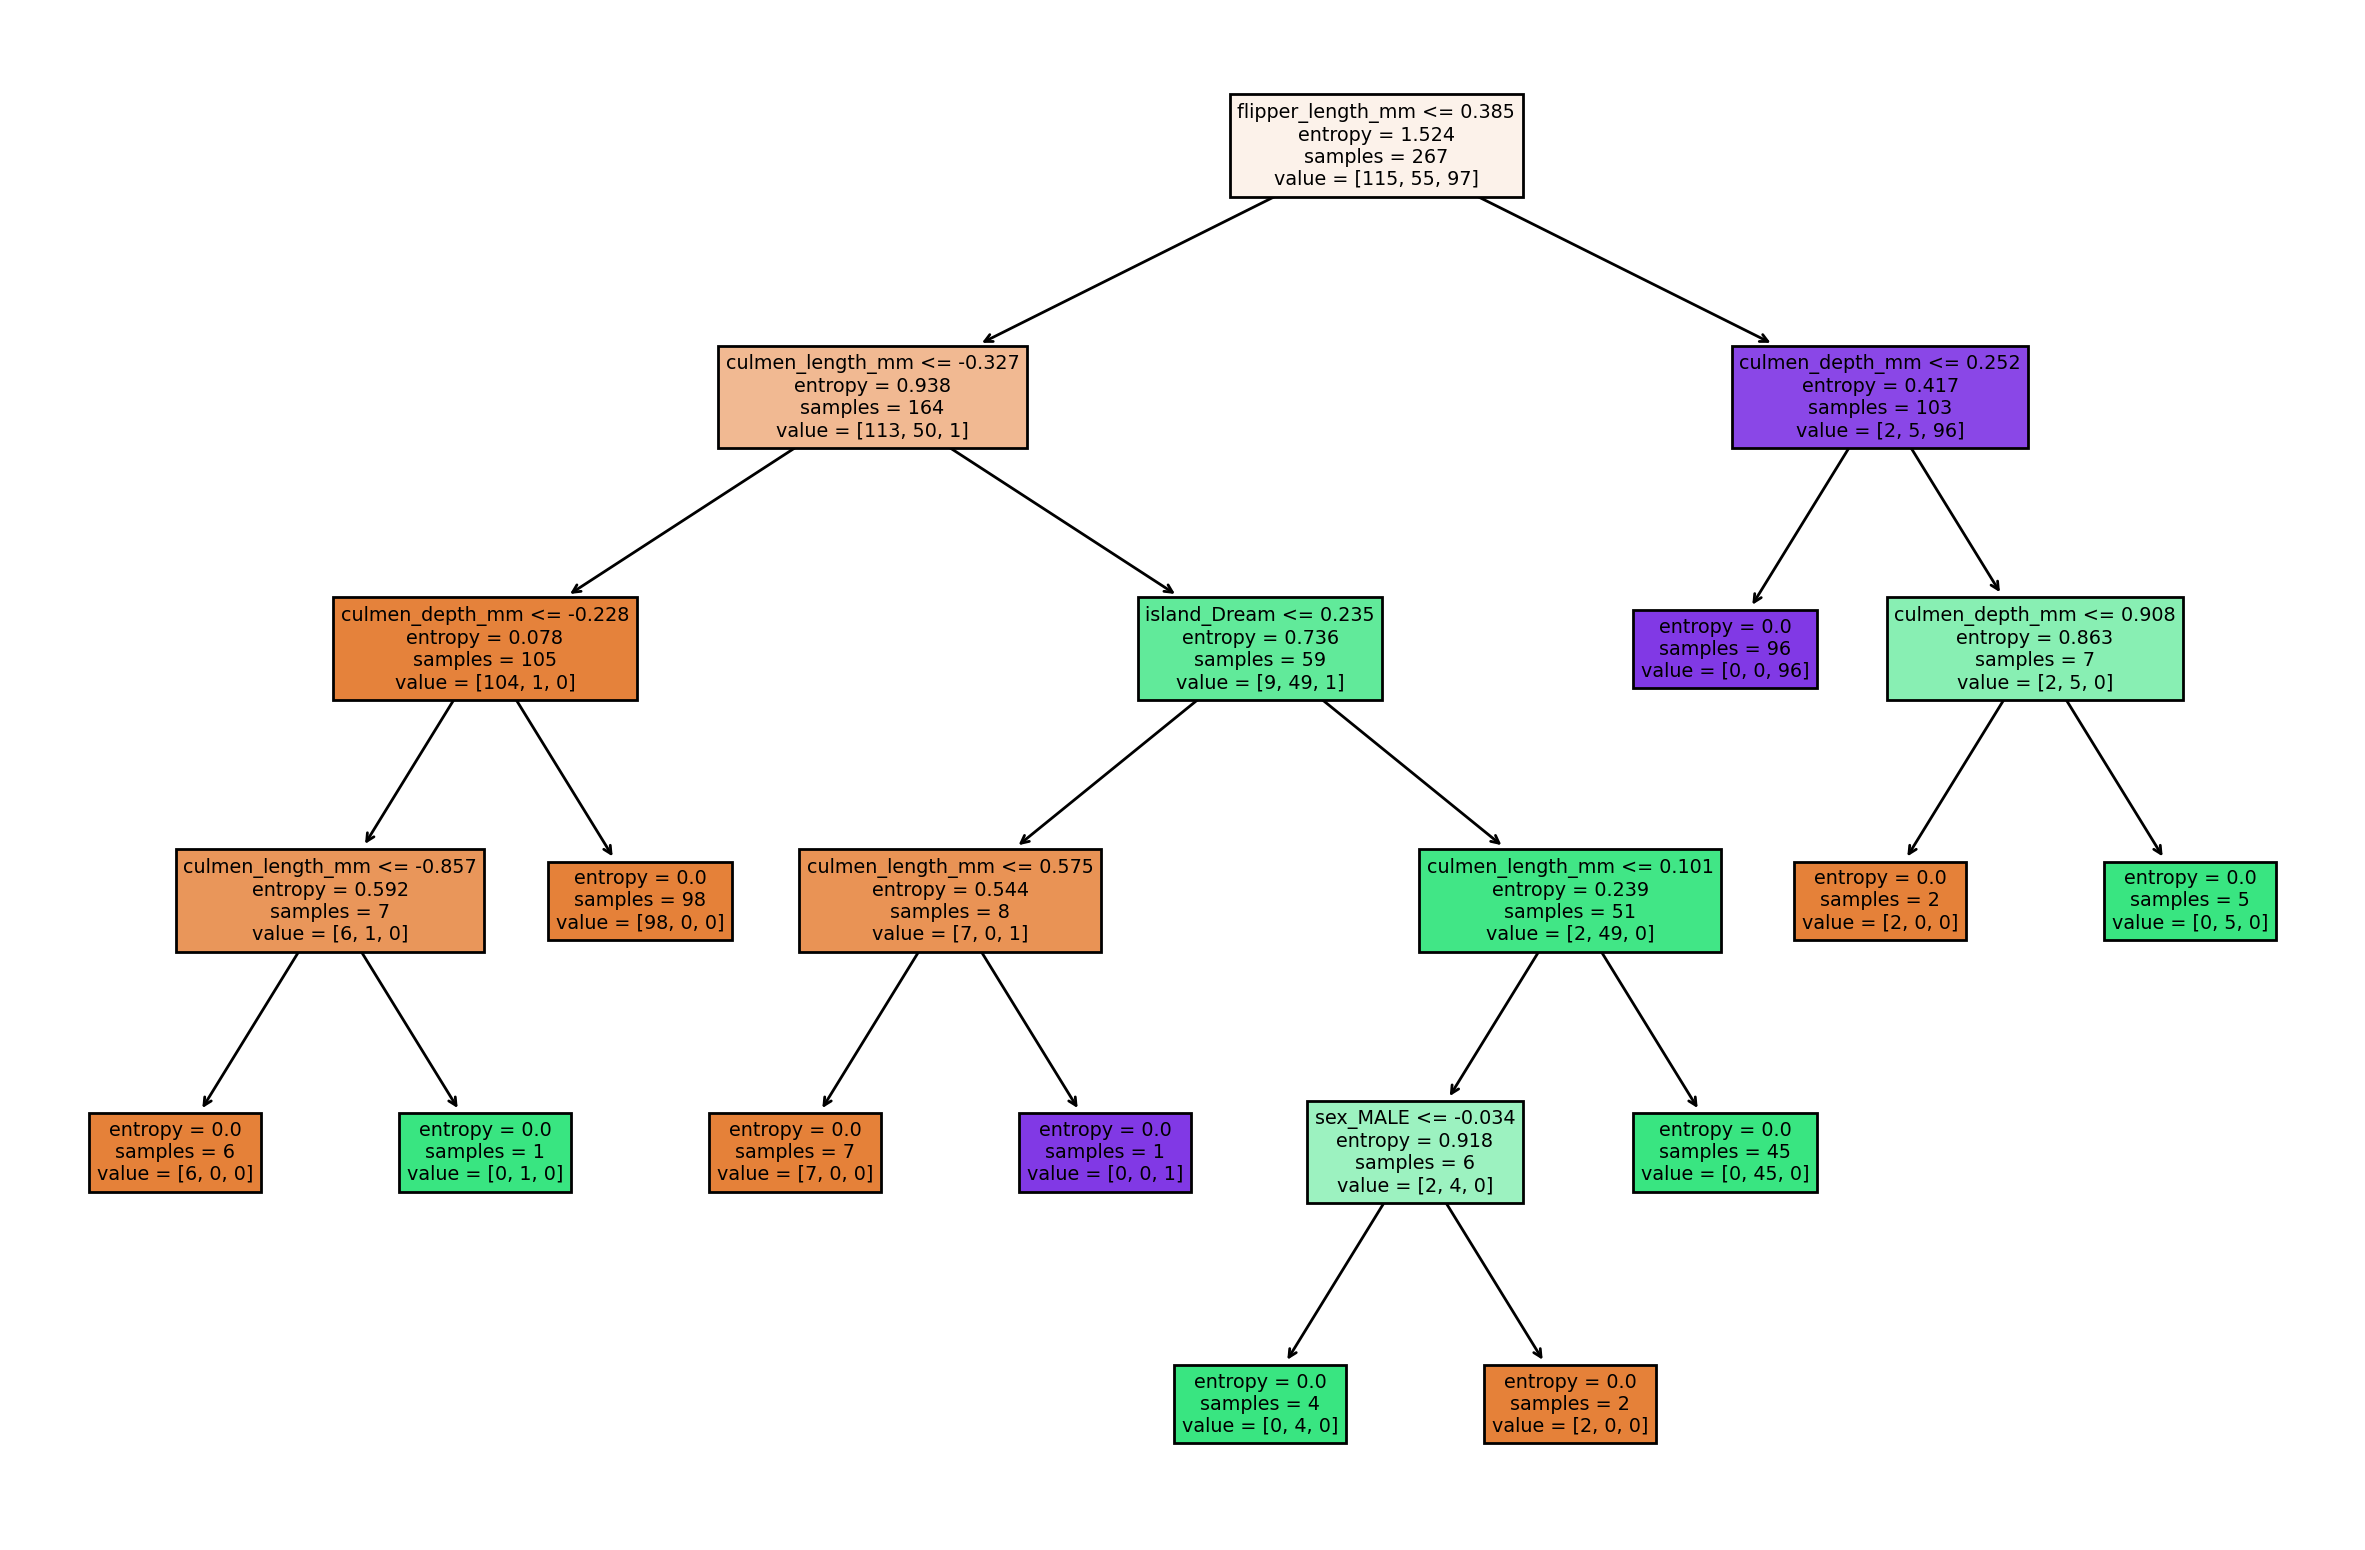

In [71]:
model_evaluation(model4)

In [72]:
model5 = DecisionTreeClassifier(criterion= "entropy", max_depth= 3)

In [73]:
model5.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

Accuracy Score is : 1.0


              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        31
   Chinstrap       1.00      1.00      1.00        13
      Gentoo       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



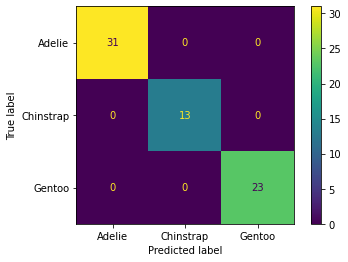

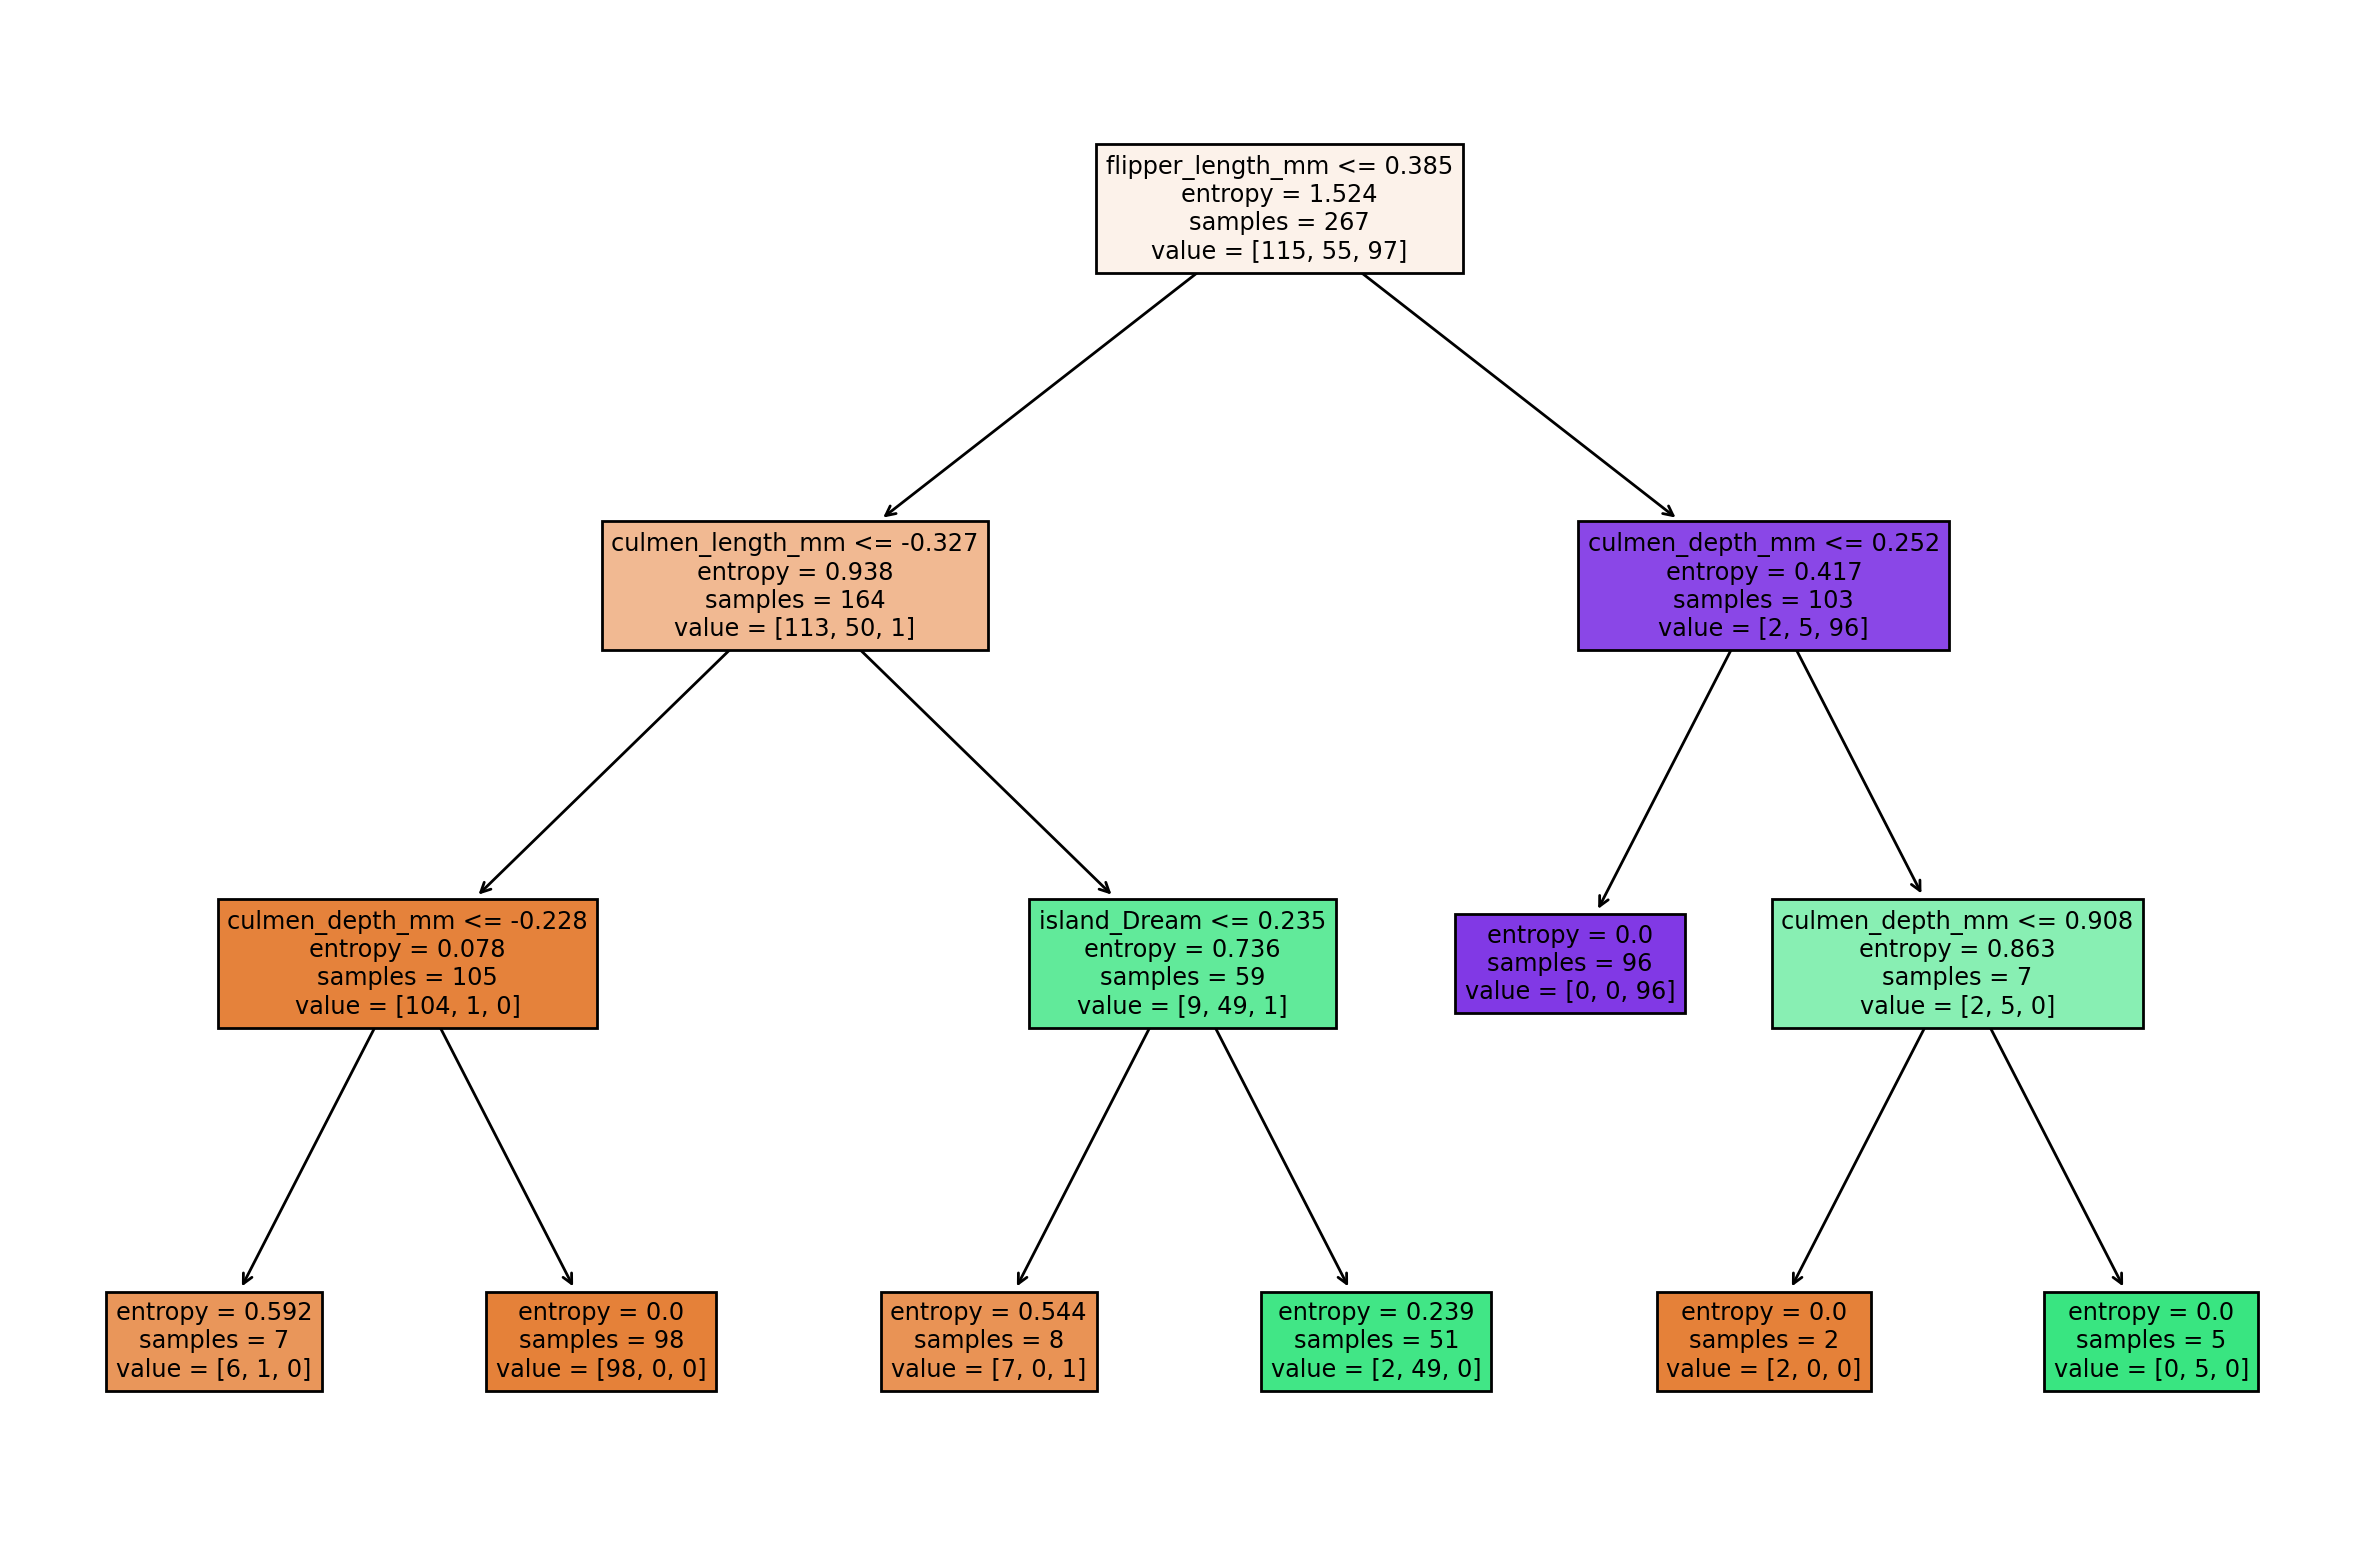

In [74]:
model_evaluation(model5)